<h3>Importing Libraries</h3>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

<h3>Reading Data Set</h3>

In [5]:
df=pd.read_csv("Advertising.csv")

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

<h3>Data Cleaning </h3>

In [9]:
#We dont want column 'Unnamed: 0'
df=df.drop("Unnamed: 0",axis=1)

In [10]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
#Will see about Data types and Non null values in data using info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#There is no null values 

In [12]:
#will see about descriptive statistics using describe() function
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<h3>Exploratory Data Analysis</h3>

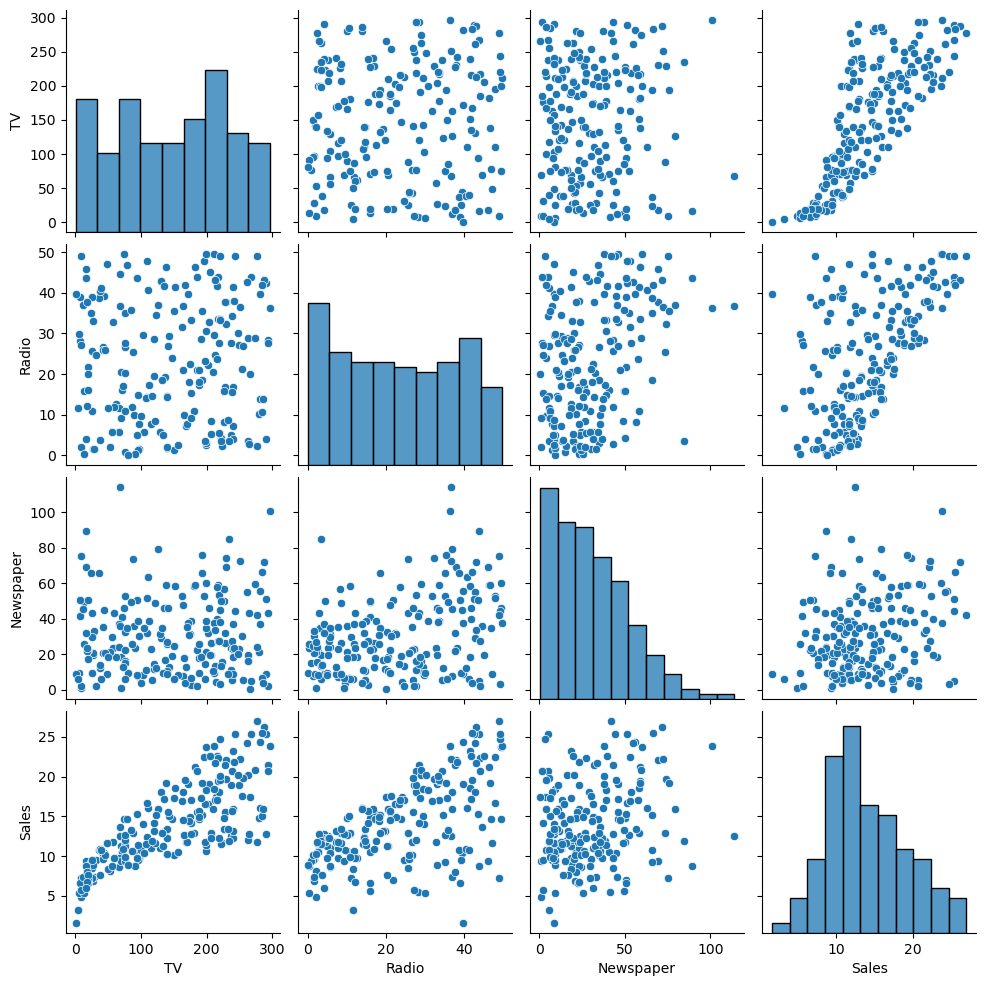

In [14]:
sns.pairplot(df)
plt.show()
#pairplot helps to identify patterns

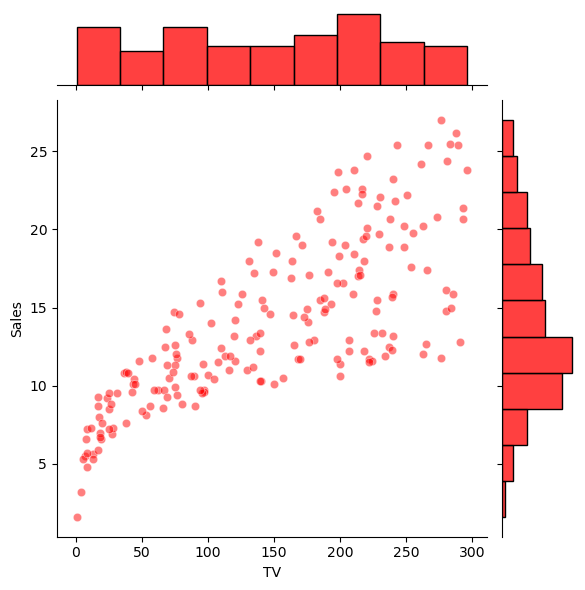

In [16]:
#From the above relation we can conclude that sales and Tv and sales and radio are highly correlated 
#Will use jointplot to know more about every feature with sales
sns.jointplot(x="TV",y="Sales",data=df,color='r',alpha=0.5)
plt.show()

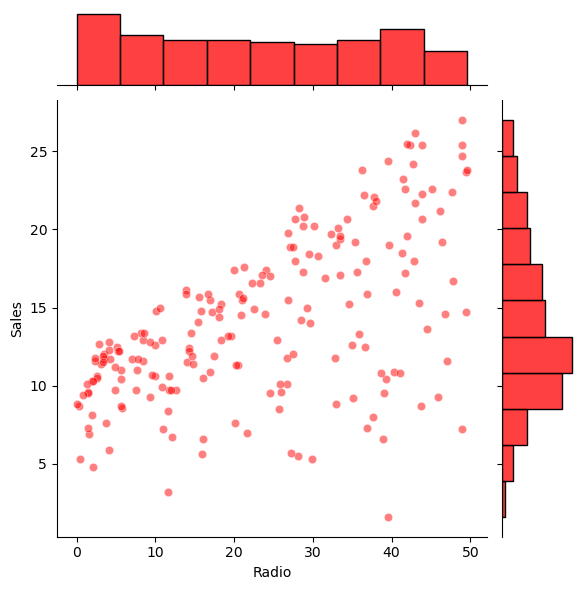

In [17]:
sns.jointplot(x="Radio",y="Sales",data=df,color='r',alpha=0.5)
plt.show()

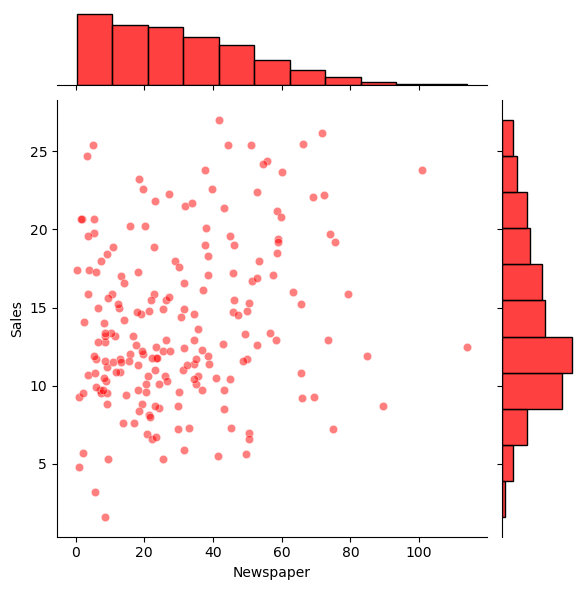

In [18]:
sns.jointplot(x="Newspaper",y="Sales",data=df,color='r',alpha=0.5)
plt.show()

In [20]:
#Now will see about data distribution of a Tv and radio
df['TV'].skew()

-0.06985336213274573

In [21]:
#Skewness is between -0.5 to 0.5 so it is normally distributed

In [22]:
df['Radio'].skew()

0.09417463149664404

In [23]:
#Skewness is between -0.5 to 0.5 so it is normally distributed

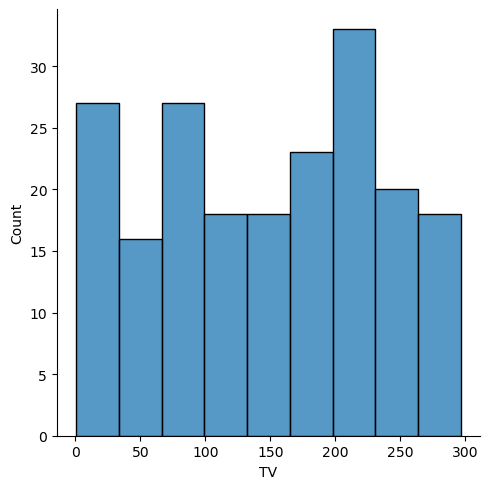

In [24]:
sns.displot(df,x="TV")

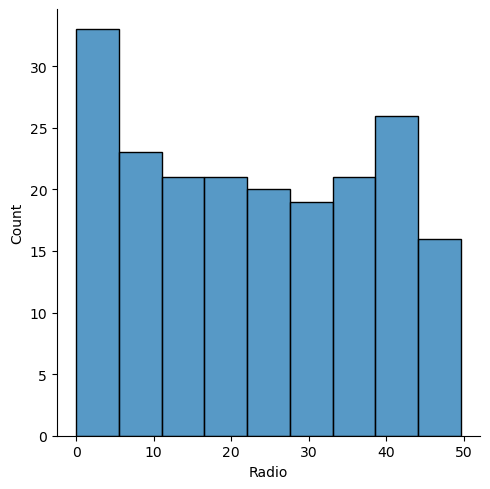

In [26]:
sns.displot(df,x='Radio')

<h2>Linear Regression</h2>

<h4>Importing Libraries</h4>

In [37]:
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

<h4>splitting Data into Training and test</h4>

In [29]:
#Only TV and Radio is highly correlated so we will use that 2 features only for training our model
X=df[["TV",'Radio']]
y=df["Sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<h4>Training our Model</h4>

In [30]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

<h4>Predicting our y_test values</h4>

In [31]:
y_pred=lr.predict(X_test)

<h4>Scatter plot of y_test vs y_pred</h4>

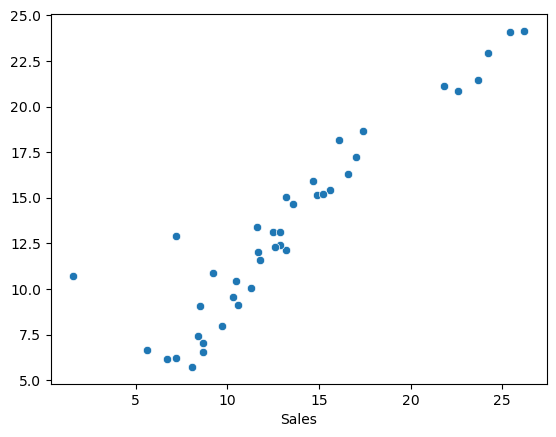

In [36]:
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

<h4>Evaluating the model</h4>

In [38]:
print("Accuracy of the model",r2_score(y_test,y_pred))

Accuracy of the model 0.8604541663186571


In [39]:
print("Mean absolute error of the model",mean_absolute_error(y_test,y_pred))
print("Mean square  error of the model",mean_squared_error(y_test,y_pred))
print("Root mean square error of the model",np.sqrt(mean_squared_error(y_test,y_pred))) 

Mean absolute error of the model 1.3723979221023086
Mean square  error of the model 4.391429763581876
Root mean square error of the model 2.0955738506628383


<h5>Here our model accuracy is 86.04% </h5>

In [40]:
# Now we will add third feature newspaper to predict the accuracy 
df["Newspaper"].skew()

0.8947204074986175

In [43]:
#Data is not normally distribued so will use some techniques to convert into normal distribution
df["NewsPaper_log"]=np.log(df["Newspaper"]+1)

In [44]:
df["NewsPaper_log"].skew()

-0.7998749355228584

In [45]:
df["NewsPaper_sqrt"]=np.log(df["Newspaper"])

In [46]:
df["NewsPaper_sqrt"].skew()

-1.1812391915232812

In [47]:
df["NewsPaper_cbrt"]=np.cbrt(df["Newspaper"])

In [48]:
df["NewsPaper_cbrt"].skew()

-0.2655216957797749

In [49]:
df["NewsPaper_exp"]=np.exp(df["Newspaper"])

In [50]:
df["NewsPaper_exp"].skew()

14.142135623641328

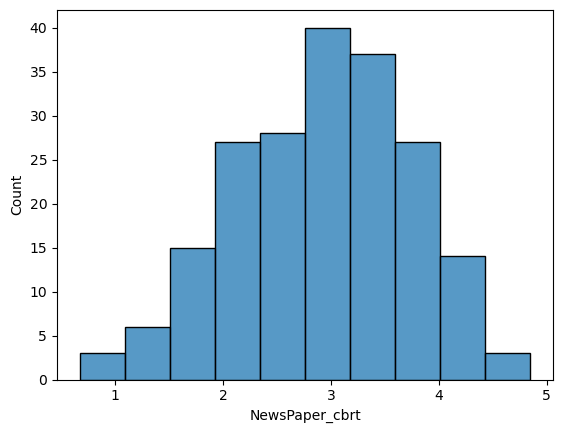

In [52]:
#We will use cbrt wich is -0.2 only
sns.histplot(df["NewsPaper_cbrt"])
plt.show()

In [54]:
#Now will split and train our model
X=df[["TV",'Radio',"NewsPaper_cbrt"]]
y=df["Sales"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=0)
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
y_pred=lr.predict(X_test)

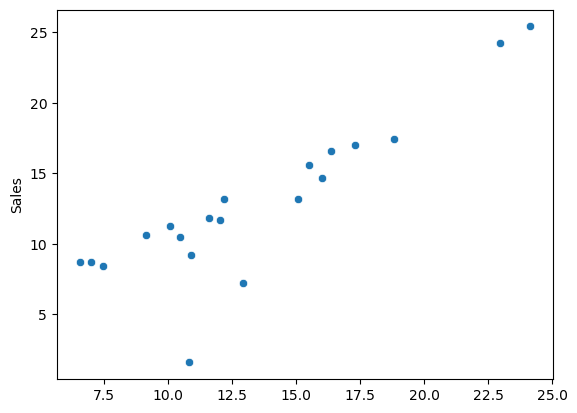

In [57]:
sns.scatterplot(x=y_pred,y=y_test)
plt.show()

In [58]:
print("Accuracy of the model",r2_score(y_test,y_pred))

Accuracy of the model 0.7551836601396509


In [59]:
print("Mean absolute error of the model",mean_absolute_error(y_test,y_pred))
print("Mean square  error of the model",mean_squared_error(y_test,y_pred))
print("Root mean square error of the model",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error of the model 1.6709527681183627
Mean square  error of the model 7.234445251043245
Root mean square error of the model 2.6896924082584692


<h5>Accuracy is only 75.5 % so it is better to remove Newspaper feature to train our model</h5>